In [1]:
#libraries
import pandas as pd #датафреймы
import numpy as np #массивы, линейная алгебра
import pylab as pl #графики
import math
import matplotlib as mpl #графики
%matplotlib inline
%pylab inline
import datetime
import seaborn as sns #красивые графики!
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
#build distribution
def frameEDF(sample,numbin, edge1, edge2):
    num=numbin
    F=[0 for i in range(num)]
    width=(edge2-edge1)/(num-1)
    xedges=[edge1+(i)*width for i in range(num)]
    for i in range(num):
        F[i]=len(sample.loc[sample <= xedges[i]])/float(len(sample))
    return xedges,F,width
#calculate distances
def distance(xedges1,F1,xedges2,F2):
    F=[0 for i in range(len(F1))]
    for i in range(len(F1)):
        F[i]=abs(F1[i]-F2[i])
    return max(F)
#plot distances
def distanceplot(sample,window,bins):
    length=len(sample)-2*window
    dist=[0 for i in range(length)]
    for i in range(length):
        edge1=sample[i:i+2*window].min()
        edge2=sample[i:i+2*window].max()
        xedges1,F1,width1=frameEDF(sample[i:i+window],bins,edge1,edge2)
        xedges2,F2,width2=frameEDF(sample[i+window:i+2*window],bins,edge1,edge2)
        dist[i]=distance(xedges1,F1,xedges2,F2)
    return dist
def get_indices_lists(df):
    series = distanceplot(df['Mw'],200,10)
    mean_value = np.mean(series)
    mean = [mean_value for i in range(len(series))]
    max_indices = []
    min_indices = []

    begin = 0
    end = 0

    sign = int((series[0] - mean_value) / abs(series[0] - mean_value))

    for i in range(len(series)-1):
        if (series[i] - mean_value)*(series[i+1] - mean_value) < 0:

            end = i+1

            if sign == +1:
                max_value = max(series[begin:end+1])
                max_index = series[begin:end+1].index(max_value)
                max_indices.append(max_index + begin)
            else:
                min_value = min(series[begin:end+1])
                min_index = series[begin:end+1].index(min_value)
                min_indices.append(min_index + begin)
            begin = end
            sign *= -1
    indices = max_indices + min_indices
    indices.sort()
    return series, mean, max_indices, min_indices, indices
def disorder_period(path):
    print path
    df=pd.read_csv(path, sep = ' ', index_col=False, names = ['time','lat','lon','depth','Mb','Mw'])
    series, mean, max_indices, min_indices, indices = get_indices_lists(df)
    print "Ряд расстояний между выборками стык-в-стык длины 200"
    plt.figure()
    plot(series)
    plot(mean)
    plt.show()

    print "Распределение расстояний между пиками"
    plt.figure()
    hist(np.diff(indices), alpha = 0.6, label = "max-min")
    hist(np.diff(max_indices), alpha = 0.6, label = "max-max")
    #hist(np.diff(min_indices), alpha = 0.6, label = "min-min")
    plt.legend()
    plt.show()

Japan.txt
Ряд расстояний между выборками стык-в-стык длины 200


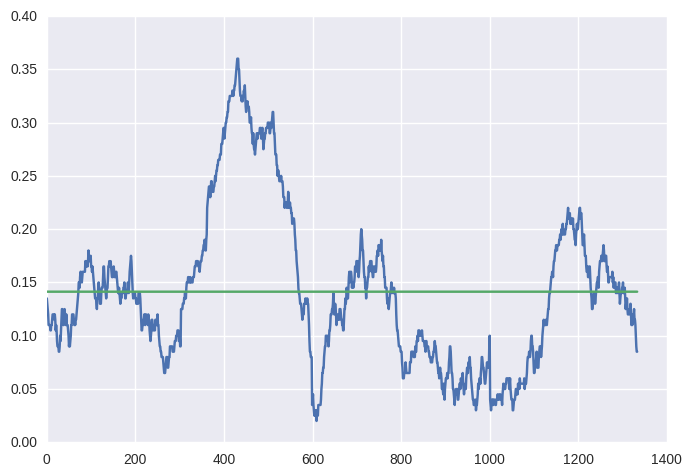

Распределение расстояний между пиками


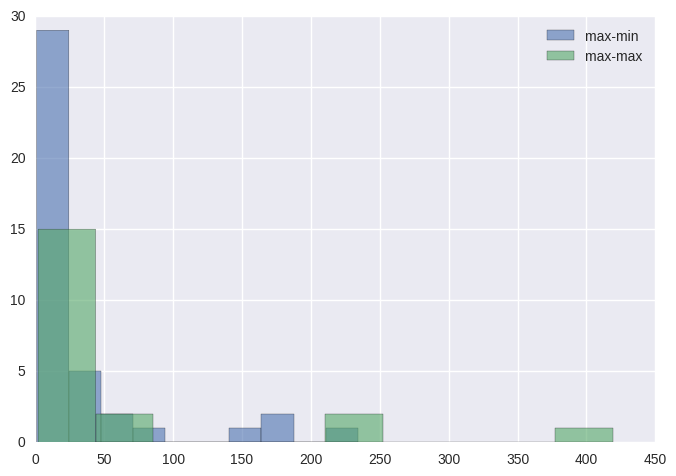

Japan_C.txt
Ряд расстояний между выборками стык-в-стык длины 200


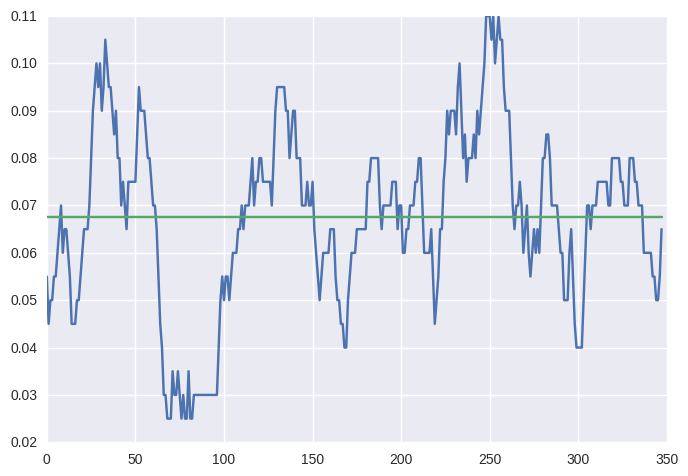

Распределение расстояний между пиками


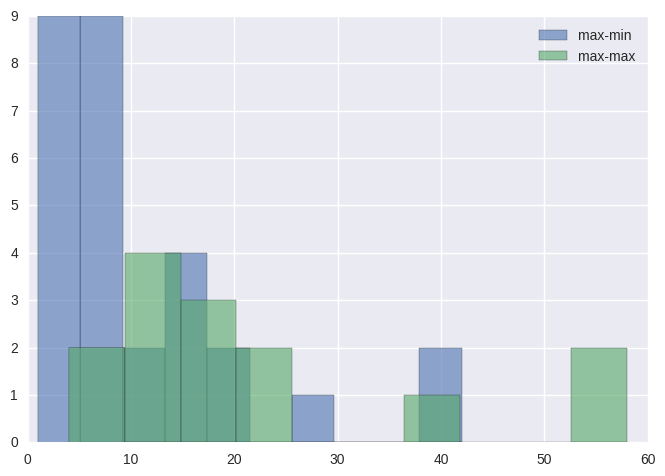

In [3]:
for path in ['Japan.txt', 'Japan_C.txt']:
    disorder_period(path)

M_Atl_R.txt
Ряд расстояний между выборками стык-в-стык длины 200


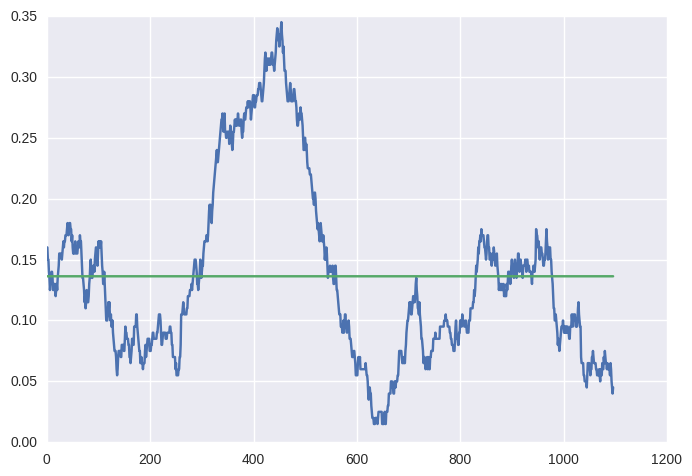

Распределение расстояний между пиками


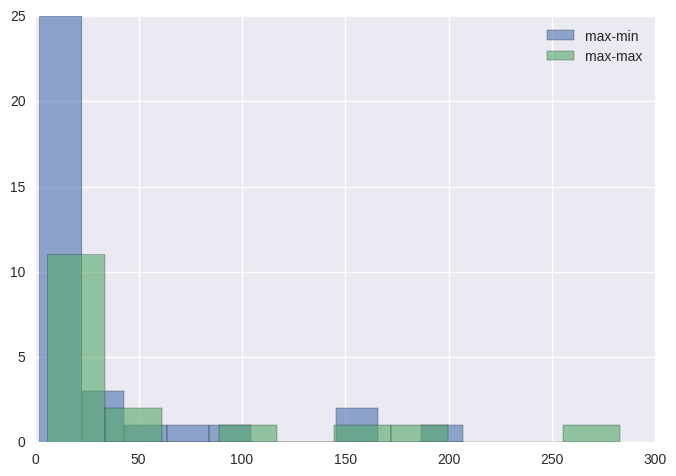

M_Atl_R_C.txt
Ряд расстояний между выборками стык-в-стык длины 200


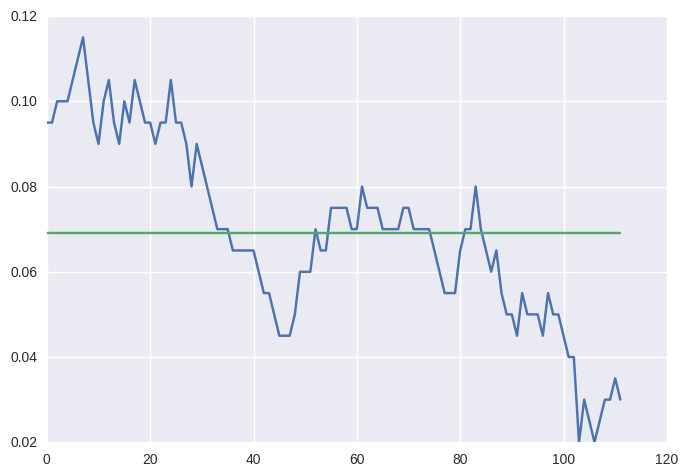

Распределение расстояний между пиками


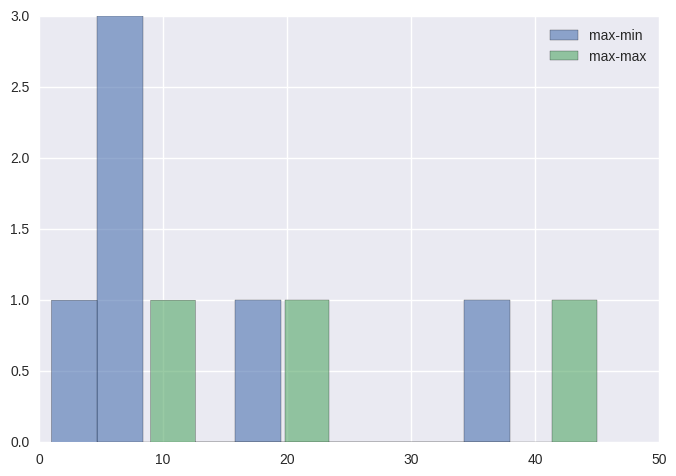

In [4]:
for path in ['M_Atl_R.txt','M_Atl_R_C.txt']:
    disorder_period(path)

New_HEB.txt
Ряд расстояний между выборками стык-в-стык длины 200


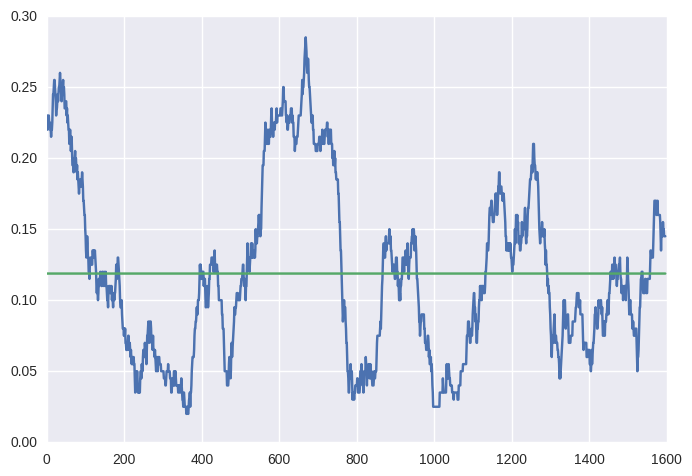

Распределение расстояний между пиками


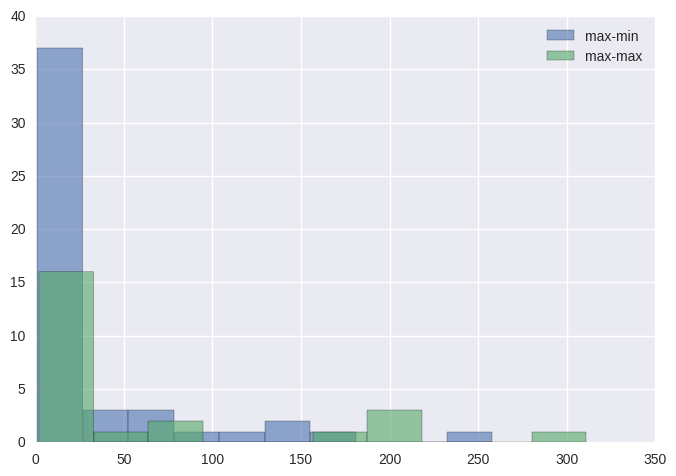

New_HEB_C.txt
Ряд расстояний между выборками стык-в-стык длины 200


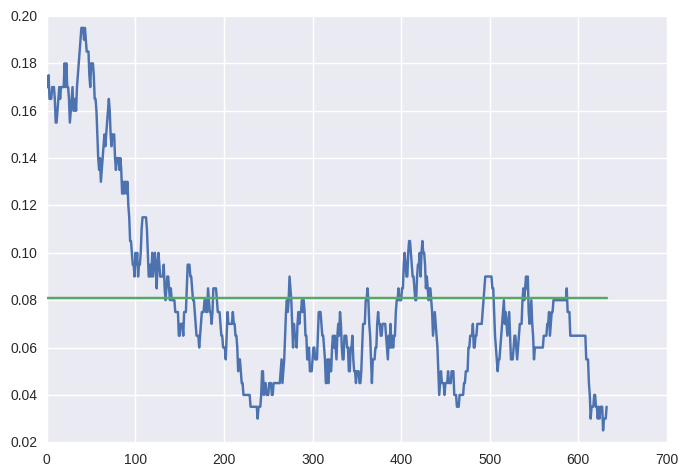

Распределение расстояний между пиками


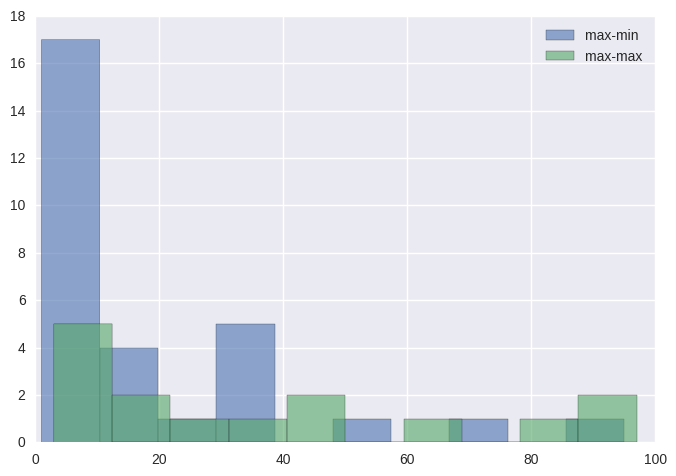

In [5]:
for path in ['New_HEB.txt','New_HEB_C.txt']:
    disorder_period(path)

TonKerm.txt
Ряд расстояний между выборками стык-в-стык длины 200


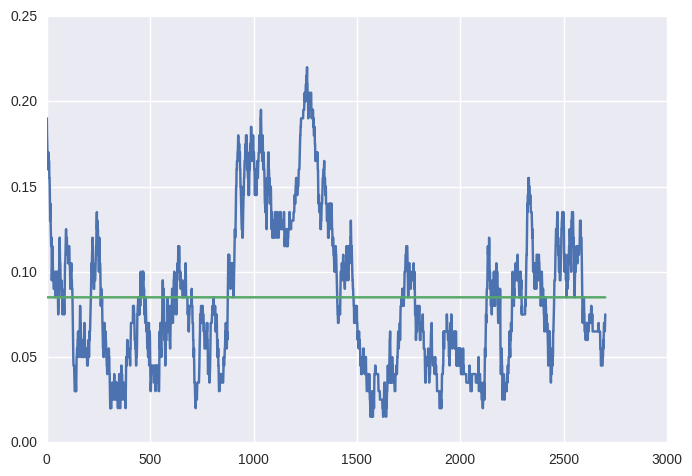

Распределение расстояний между пиками


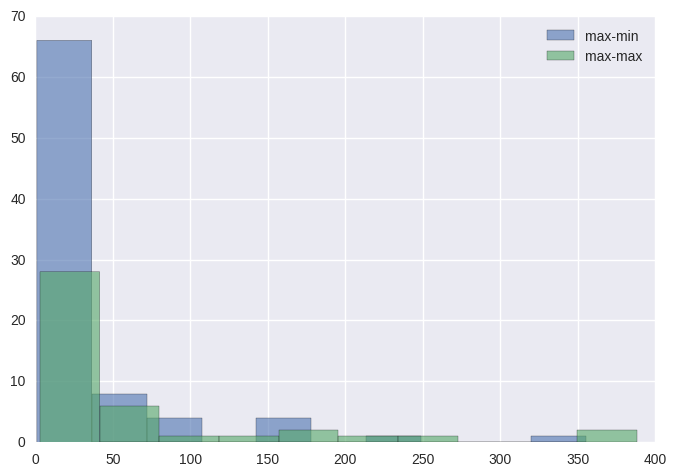

TonKerm_C.txt
Ряд расстояний между выборками стык-в-стык длины 200


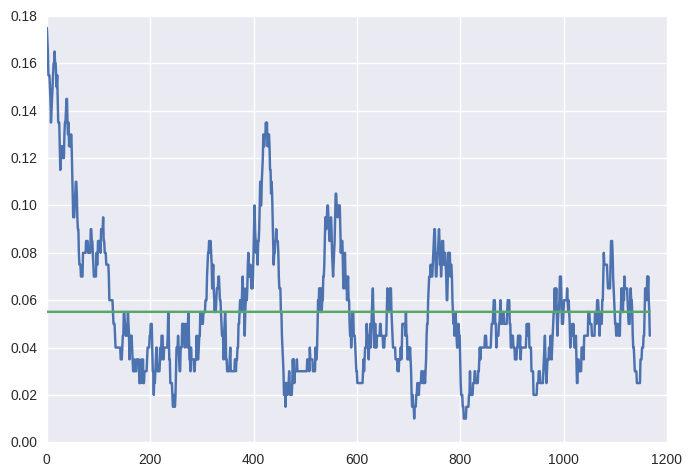

Распределение расстояний между пиками


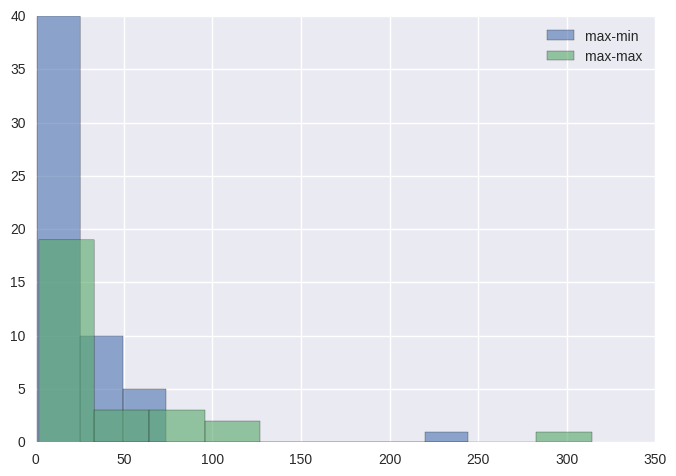

In [6]:
for path in ['TonKerm.txt', 'TonKerm_C.txt']:
    disorder_period(path)